# Exercise: Job demand

In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
df_UK = df[df['job_country'] == 'United Kingdom'].copy()

# For strftime check the datetime documentation
df_UK['job_posted_month'] = df_UK.job_posted_date.dt.strftime('%B') 
df_UK_pivot = df_UK.pivot_table(index = 'job_posted_month', columns = 'job_title_short', aggfunc = 'size')
df_UK_pivot.reset_index(inplace = True)

# i.e. what format datetime am i taking in -> change to date_time
df_UK_pivot['month_no'] = pd.to_datetime(df_UK_pivot['job_posted_month'], format = '%B').dt.month

# sort based on month enumerated column
df_UK_pivot.sort_values('month_no', inplace = True)
df_UK_pivot.set_index('job_posted_month', inplace = True)

# remove month enumerated column
df_UK_pivot.drop('month_no', axis = 1, inplace = True)

df_UK_pivot


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,3,1467,1253,1142,8,169,347,326,20
February,23,4,1051,1009,859,10,140,301,212,10
March,47,5,712,789,699,8,91,224,179,19
April,29,7,561,611,519,8,63,155,123,18
May,23,1,614,645,486,11,60,227,153,16
June,14,2,736,862,636,3,102,292,154,4
July,38,5,892,960,646,13,116,321,184,12
August,22,7,610,863,657,15,96,247,181,13
September,111,32,1112,1191,898,51,139,320,221,116


job_title_short
Data Engineer     11807
Data Analyst      10482
Data Scientist     9148
Name: count, dtype: int64

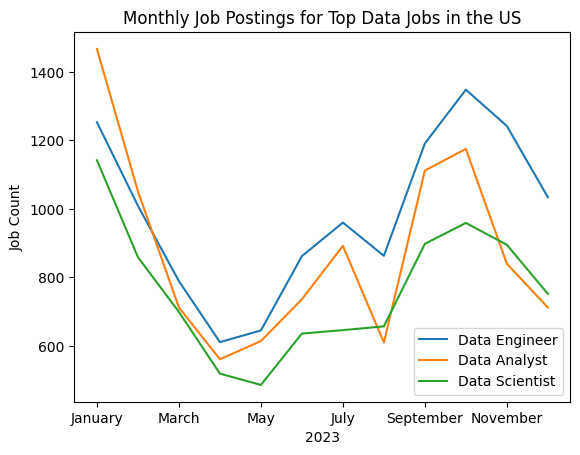

In [46]:
top_3 = df_UK['job_title_short'].value_counts().head(3)
display(top_3)
top_3 = top_3.index.tolist()

df_UK_pivot[top_3].plot(kind = 'line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()